C:\Users\tk\AppData\Local\Temp\ipykernel_39328\3913923458.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PT-TT'] = pd.to_numeric(df_cleaned['PT-TT'], errors='coerce')
C:\Users\tk\AppData\Local\Temp\ipykernel_39328\3913923458.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Moving Average'] = pd.to_numeric(df_cleaned['Moving Average'], errors='coerce')
C:\Users\tk\AppData\Local\Temp\ipykernel_39328\3913923458.py:32: SettingWithCopyWarning: 
A value is trying to be set on a c

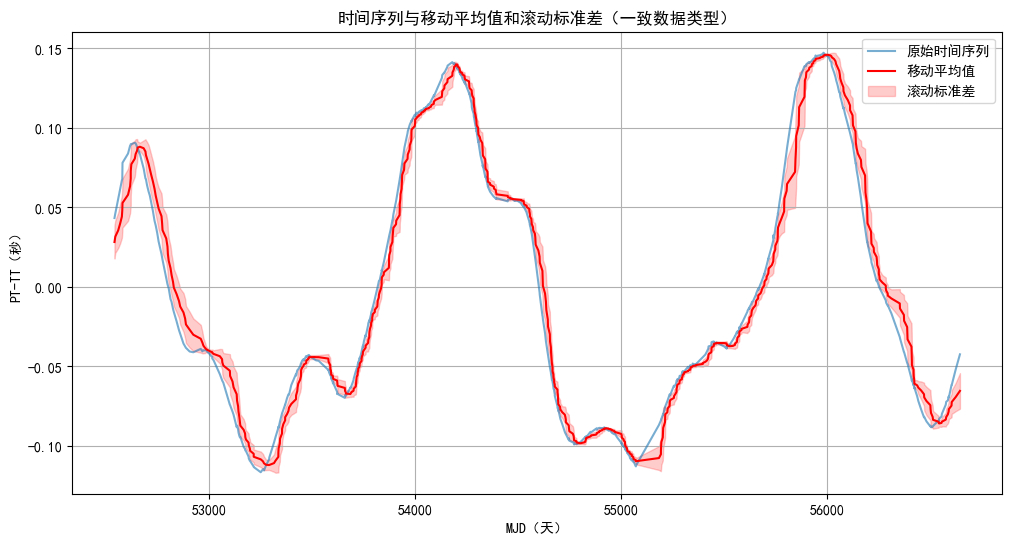

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置matplotlib字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 加载Excel文件
file_path = '问题一未划分数据.xlsx'  # 请替换为您的文件路径
data = pd.ExcelFile(file_path)

# 从相关表格加载数据
df = data.parse('Sheet1')

# 重命名列以便于处理
df.rename(columns={"MJD(days)": "MJD", "PT-TT（s）": "PT-TT"}, inplace=True)

# 按MJD排序以确保正确的时间顺序
df.sort_values(by="MJD", inplace=True)

# 计算移动平均值和滚动标准差
df['Moving Average'] = df['PT-TT'].rolling(window=10).mean()
df['Rolling Std Dev'] = df['PT-TT'].rolling(window=10).std()

# 删除滚动操作后的缺失值行
df_cleaned = df.dropna(subset=['PT-TT', 'Moving Average', 'Rolling Std Dev'])

# 确保所有列都是数值型
df_cleaned['PT-TT'] = pd.to_numeric(df_cleaned['PT-TT'], errors='coerce')
df_cleaned['Moving Average'] = pd.to_numeric(df_cleaned['Moving Average'], errors='coerce')
df_cleaned['Rolling Std Dev'] = pd.to_numeric(df_cleaned['Rolling Std Dev'], errors='coerce')

# 转换为numpy数组以便于绘图
mjd = df_cleaned['MJD'].to_numpy()
pt_tt = df_cleaned['PT-TT'].to_numpy()
moving_avg = df_cleaned['Moving Average'].to_numpy()
rolling_std = df_cleaned['Rolling Std Dev'].to_numpy()

# 绘制时间序列图，包含移动平均值和滚动标准差
plt.figure(figsize=(12, 6))
plt.plot(mjd, pt_tt, label='原始时间序列', alpha=0.6)
plt.plot(mjd, moving_avg, label='移动平均值', color='red')
plt.fill_between(mjd, moving_avg - rolling_std, moving_avg + rolling_std, 
                 color='red', alpha=0.2, label='滚动标准差')
plt.title('时间序列与移动平均值和滚动标准差（一致数据类型）')
plt.xlabel('MJD（天）')
plt.ylabel('PT-TT（秒）')
plt.legend()
plt.grid(True)
plt.show()
plt.show()
plt.show()
plt.show()


In [1]:
import torch

# 检查CUDA是否可用
print("CUDA is available:", torch.cuda.is_available())

# 打印CUDA版本
print("CUDA version:", torch.version.cuda)

# 打印可用的GPU数量
print("GPU count:", torch.cuda.device_count())

# 打印第一个GPU的名称
if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))

CUDA is available: False
CUDA version: None
GPU count: 0
